# EDA - Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_train = pd.read_csv("../data/raw/loan_sanction_train.csv")
dataset_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. Entendimiento inicial del dataset

In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Eliminamos la variable Loan_ID debido a que es solo un correlativo interno no aporta información

In [5]:
dataset_train.drop('Loan_ID', axis=1, inplace=True)

In [6]:
dataset_train.shape

(614, 12)

In [7]:
dataset_train["Loan_Status"].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

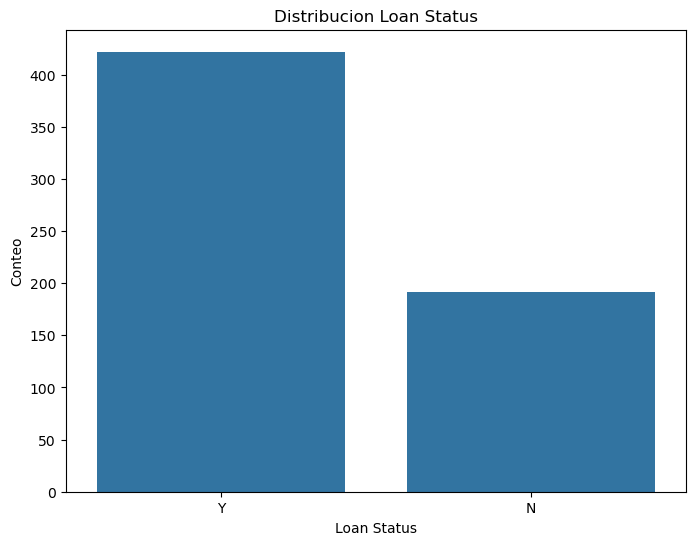

In [8]:
# Visualize class distribution for the target variable (e.g., 'Loan_Status')
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=dataset_train)
plt.title('Distribucion Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Conteo')
plt.show()

El dataset no esta desbalanceado

## 1.2 Estadisticas

In [9]:
dataset_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 1.3 Valores Nulos

In [10]:
print("\nConteo de Valores Nulos:")
print(dataset_train.isnull().sum())


Conteo de Valores Nulos:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [11]:
print("\nPorcentaje de Valores Nulos:")
print(dataset_train.isnull().mean())
 


Porcentaje de Valores Nulos:
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


## 1.4 - Escala de Variables

In [12]:
# Obtenemos variables numericas con escala continua
continuas = [col for col in dataset_train.columns if ((dataset_train[col].dtype in ["int64","float64"]) and (len(dataset_train[col].unique())>30))]
continuas

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [13]:
# Obtenemos variables numericas con escala discreta
discretas = [col for col in dataset_train.columns if ((dataset_train[col].dtype in ["int64","float64"]) and (len(dataset_train[col].unique())<=30))]
discretas

['Loan_Amount_Term', 'Credit_History']

In [14]:
# Obtenemos variables numericas con escala categoricas
categoricas = [col for col in dataset_train.columns if (dataset_train[col].dtype in ["object"] )]
categoricas

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

### 1.5 - Analisis de Variables Categoricas y Discretas vrs Target

Visualizacion de las variables Categoricas segun su distribución

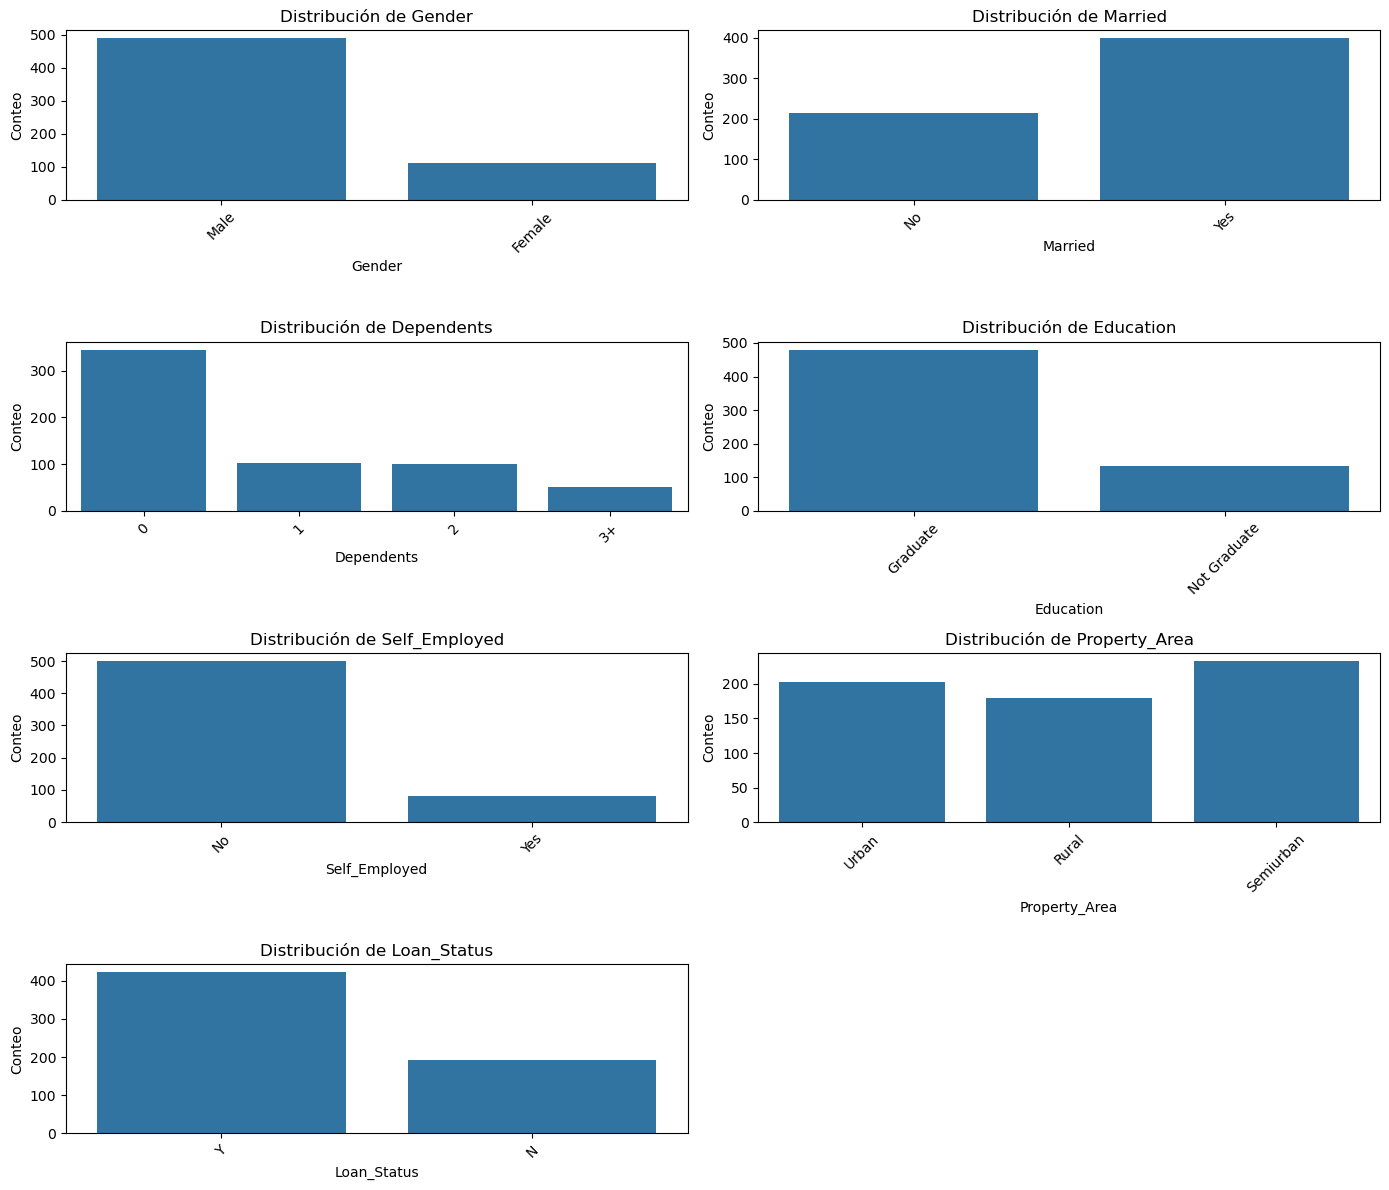

In [15]:
# Set the size of the overall figure
plt.figure(figsize=(14, 12))

# Iterate through each categorical column
for i, col in enumerate(categoricas, 1):
    # Create a subplot
    plt.subplot(4, 2, i)
    
    # Create a count plot for the current categorical column
    sns.countplot(x=col, data=dataset_train)
    
    # Set title, labels, and rotation for better readability
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

Analizamos las variables categoricas y discretas para verificar el impacto que genera cada valor dentro de la variable sobre el target

---------------------- Gender


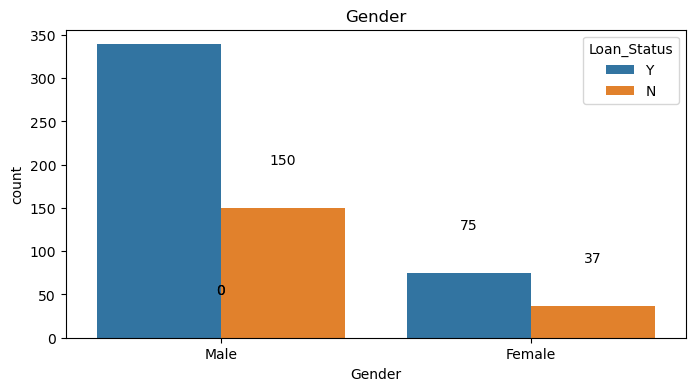

---------------------- Married


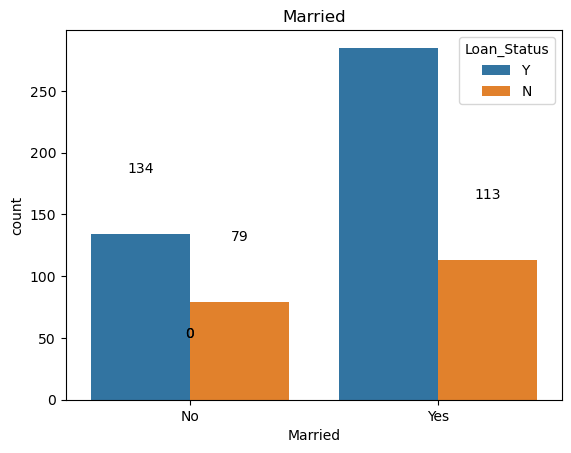

---------------------- Dependents


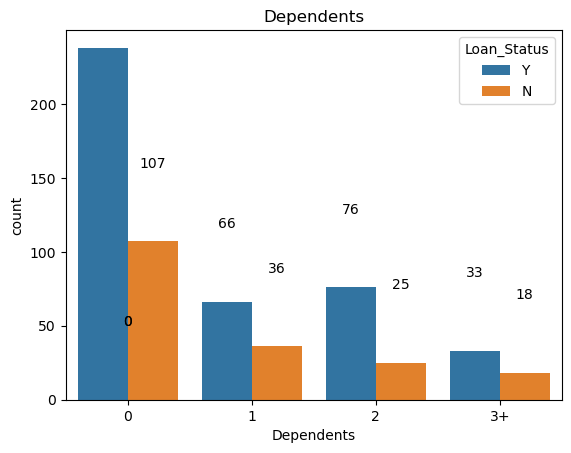

---------------------- Education


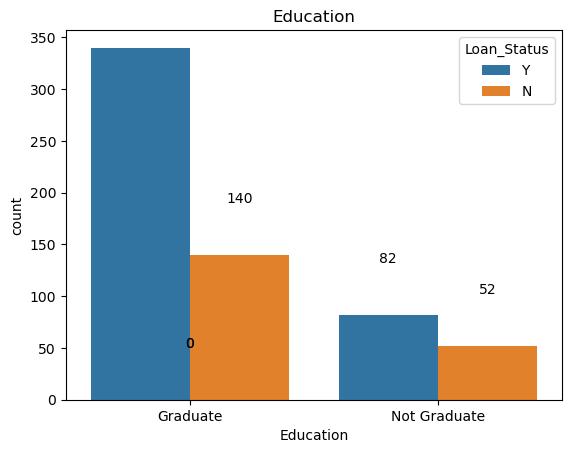

---------------------- Self_Employed


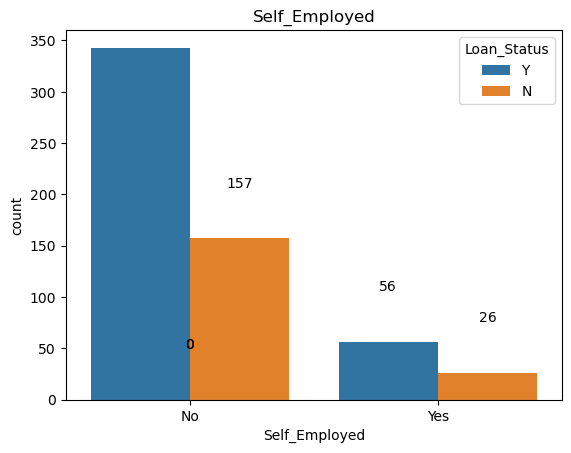

---------------------- Property_Area


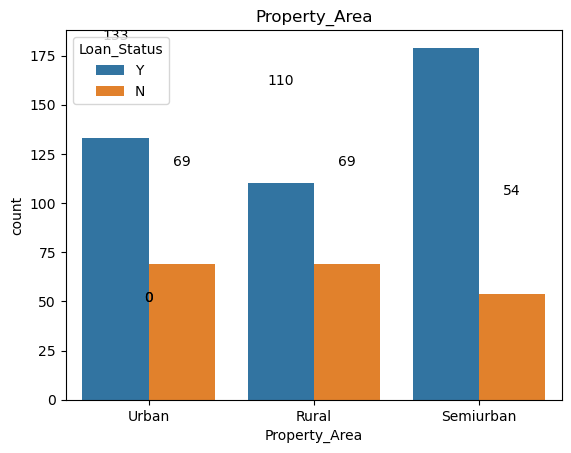

---------------------- Loan_Status


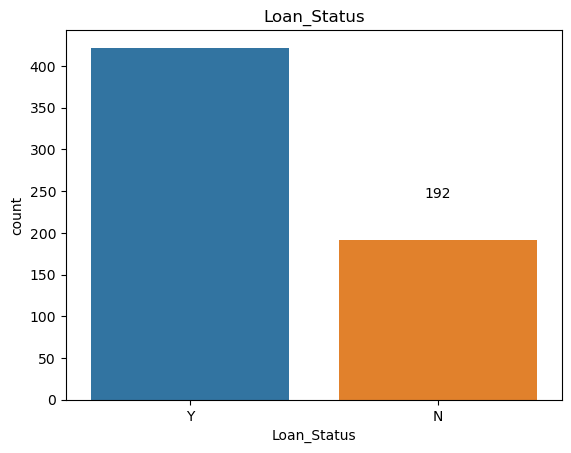

In [16]:
plt.figure(figsize=(8,4))


for colName in categoricas:
    plot = sns.countplot(x=dataset_train[colName], hue=dataset_train["Loan_Status"])
    plt.title(colName)
    print("---------------------- "+colName)

    for p in plot.patches:
        plot.annotate(str(int(p.get_height())), (p.get_x() + p.get_width()/2, p.get_height() + 50), ha='center')
    plt.show()

---------------------- Loan_Amount_Term


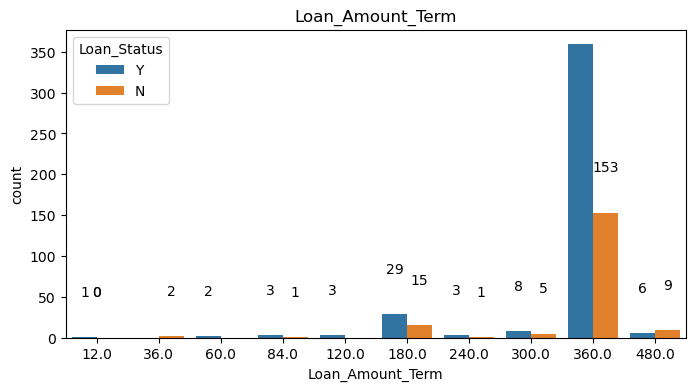

---------------------- Credit_History


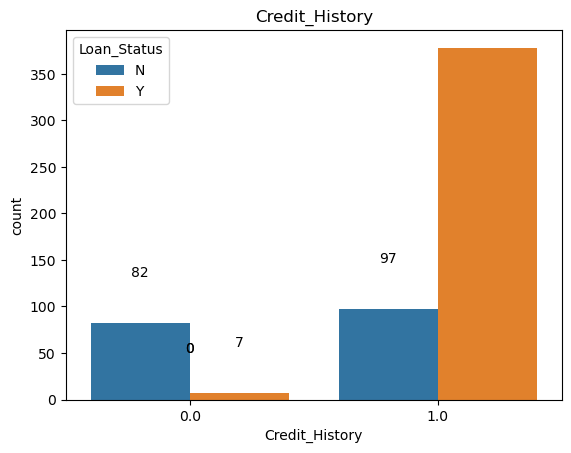

In [17]:
plt.figure(figsize=(8,4))


for colName in discretas:
    plot = sns.countplot(x=dataset_train[colName], hue=dataset_train["Loan_Status"])
    plt.title(colName)
    print("---------------------- "+colName)

    for p in plot.patches:
        plot.annotate(str(int(p.get_height())), (p.get_x() + p.get_width()/2, p.get_height() + 50), ha='center')
    plt.show()

### 1.6 - Analisis de Variables Continuas vrs Target

Analizamos las variables continuas para verificar el impacto que genera cada valor dentro de la variable sobre el target

---------------------- ApplicantIncome


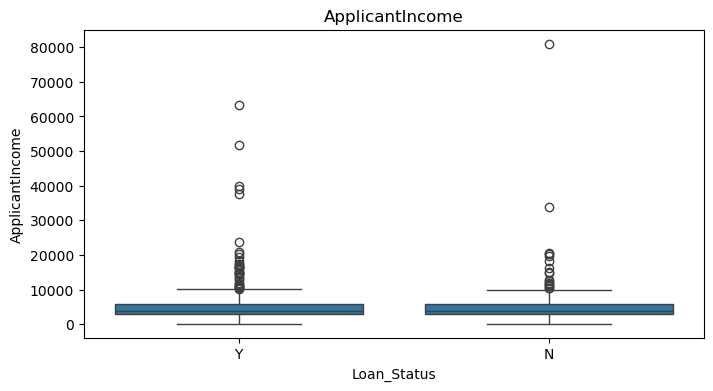

---------------------- CoapplicantIncome


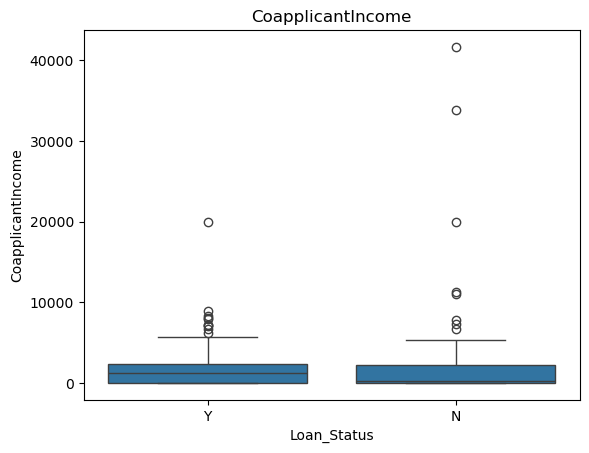

---------------------- LoanAmount


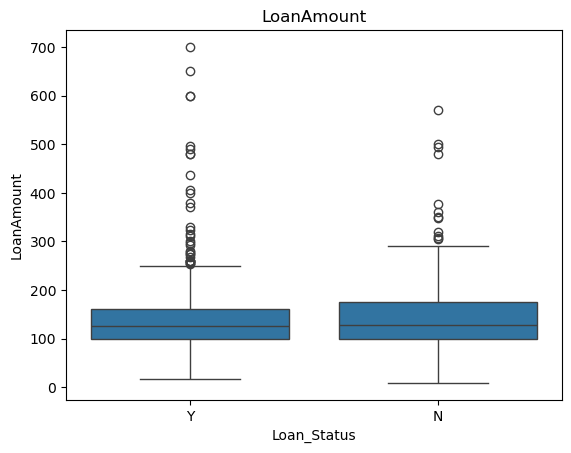

In [18]:
plt.figure(figsize=(8,4))


for colName in continuas:
    plot = sns.boxplot(x=dataset_train["Loan_Status"], y=dataset_train[colName])
    plt.title(colName)
    print("---------------------- "+colName)

    plt.show()

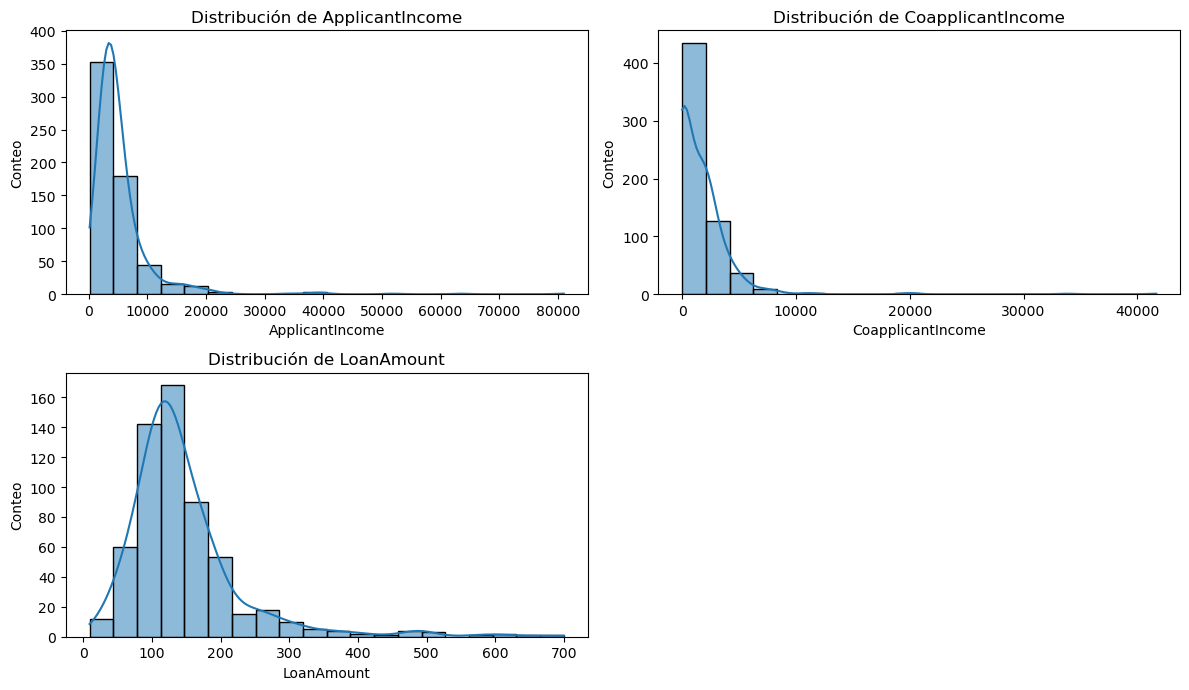

In [19]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(continuas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset_train[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

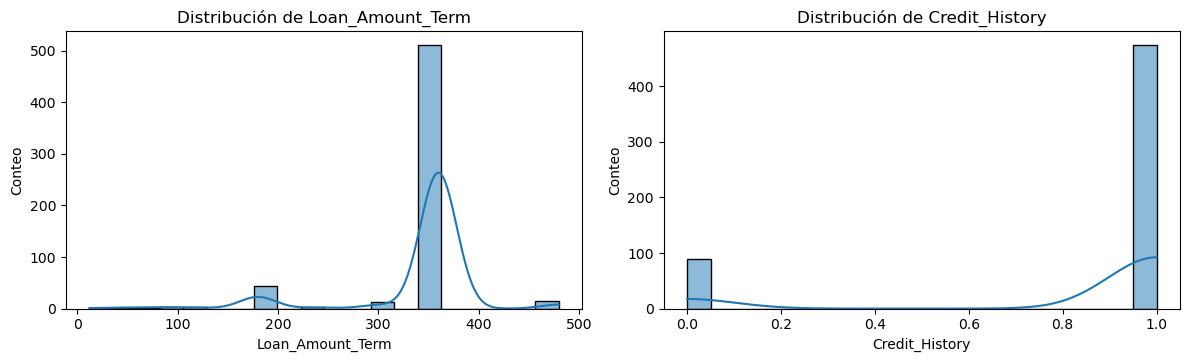

In [20]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(discretas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset_train[col], bins=20, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

Guardamos las variables segun su escala del train

In [21]:
variables_escaling = {
    'categoricas': categoricas,
    'continuas': continuas,
    'discretas': discretas
}

import pickle

with open("../artifacts/variables_escaling.pkl","wb") as f:
    pickle.dump(variables_escaling,f)